# Text Loader

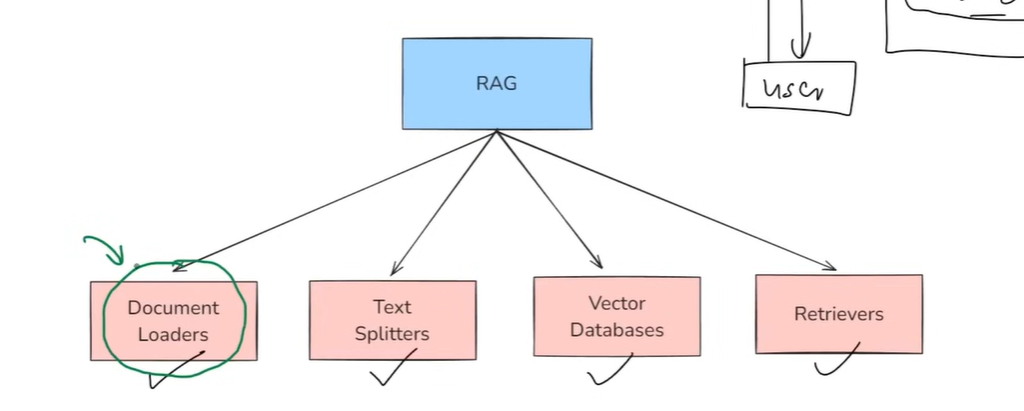

In [2]:
from langchain_community.document_loaders import TextLoader
from langchain_ollama  import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from dotenv import load_dotenv
load_dotenv()

c:\Users\prana\Desktop\VS_CODE\LangChainModels\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [3]:
loader = TextLoader(r"C:\Users\prana\Desktop\VS_CODE\LangChainModels\DocumentLoaders\text_file.txt" ,encoding="utf-8")
docs = loader.load()

In [4]:
type(docs)

list

In [5]:
len(docs)

1

In [6]:
docs

[Document(metadata={'source': 'C:\\Users\\prana\\Desktop\\VS_CODE\\LangChainModels\\DocumentLoaders\\text_file.txt'}, page_content="The Bombay Stock Exchange (BSE), established in 1875, is Asia's oldest stock exchange\nand a cornerstone of India's financial system. It provides a regulated platform for investors\nto buy and sell a wide array of financial instruments, facilitating capital formation for\ncorporations and wealth creation for investors. As of today, over 6,000 companies are\nlisted on the BSE, making it one of the largest exchanges globally in terms of listed\nentities (HDFC Bank). The trading on BSE is fully electronic, operating on the BOLT (BSE\nOn-Line Trading) system, and is regulated by the Securities and Exchange Board of India\n(SEBI).\nThe securities traded on the BSE can be broadly categorized into several major\nsegments, each serving different investment objectives and risk appetites.\n1.1 Equity Instruments\nEquity instruments represent ownership in a company. 

In [7]:
type(docs[0])

langchain_core.documents.base.Document

In [8]:
with open(r"C:\Users\prana\Desktop\VS_CODE\LangChainModels\DocumentLoaders\text_file.txt" ,encoding="utf-8") as file:
    text = file.read()
print(type(text))

<class 'str'>


In [9]:
type(docs[0].page_content)

str

In [10]:
docs[0].page_content

"The Bombay Stock Exchange (BSE), established in 1875, is Asia's oldest stock exchange\nand a cornerstone of India's financial system. It provides a regulated platform for investors\nto buy and sell a wide array of financial instruments, facilitating capital formation for\ncorporations and wealth creation for investors. As of today, over 6,000 companies are\nlisted on the BSE, making it one of the largest exchanges globally in terms of listed\nentities (HDFC Bank). The trading on BSE is fully electronic, operating on the BOLT (BSE\nOn-Line Trading) system, and is regulated by the Securities and Exchange Board of India\n(SEBI).\nThe securities traded on the BSE can be broadly categorized into several major\nsegments, each serving different investment objectives and risk appetites.\n1.1 Equity Instruments\nEquity instruments represent ownership in a company. When you buy a share, you\nbecome a part-owner of the business, entitling you to a portion of its profits and a say in\nits governa

In [11]:
docs[0].metadata

{'source': 'C:\\Users\\prana\\Desktop\\VS_CODE\\LangChainModels\\DocumentLoaders\\text_file.txt'}

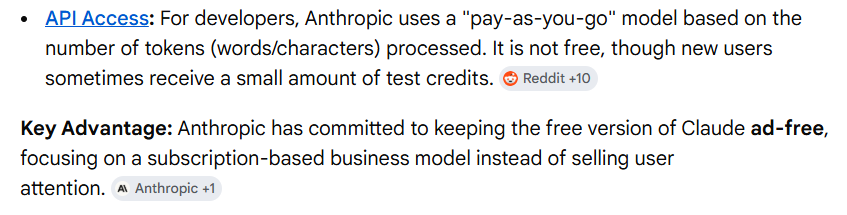

## Modelling

In [12]:
model = ChatOllama(model="qwen3:latest")

In [13]:
prompt = PromptTemplate(
    template='Write a summary for the following paragraph - \n {paragraph}',
    input_variables=['paragraph']
)
parser = StrOutputParser()

In [14]:
chain = prompt | model | parser
result = chain.invoke({"paragraph": docs[0].page_content})


In [15]:
result


"The Bombay Stock Exchange (BSE), founded in 1875, is Asia's oldest and a pivotal part of India's financial system. It offers a regulated platform for trading diverse financial instruments, enabling capital formation for companies and wealth creation for investors. With over 6,000 listed companies, it ranks among the world's largest exchanges. Trading is fully electronic via the BOLT system and overseen by SEBI. Key securities include equity instruments, such as equity shares, which grant ownership, voting rights, and potential dividends. However, dividends are not guaranteed and depend on corporate profitability and board decisions. Equity shareholders have the final claim on assets during liquidation."

In [16]:
chain = prompt | model 
result = chain.invoke({"paragraph": docs[0].page_content})
result

AIMessage(content='The Bombay Stock Exchange (BSE), founded in 1875, is Asia’s oldest stock exchange and a vital pillar of India’s financial system. It serves as a regulated platform for trading diverse financial instruments, enabling capital formation for companies and wealth generation for investors. With over 6,000 listed companies, it ranks among the world’s largest exchanges in terms of listed entities. Trading is fully electronic via the BOLT (BSE On-Line Trading) system and overseen by the Securities and Exchange Board of India (SEBI).  \n\nThe BSE’s securities are categorized into segments, with equity instruments being a major category. Equity shares, the most common type, represent ownership in a company, granting shareholders voting rights on corporate decisions and eligibility for dividends (which are not guaranteed). In the event of liquidation, equity shareholders have the final claim on a company’s assets after all debts and obligations are settled. This structure unders

In [17]:
type(result)

langchain_core.messages.ai.AIMessage

In [18]:
for x in result:
    print(x)

('content', 'The Bombay Stock Exchange (BSE), founded in 1875, is Asia’s oldest stock exchange and a vital pillar of India’s financial system. It serves as a regulated platform for trading diverse financial instruments, enabling capital formation for companies and wealth generation for investors. With over 6,000 listed companies, it ranks among the world’s largest exchanges in terms of listed entities. Trading is fully electronic via the BOLT (BSE On-Line Trading) system and overseen by the Securities and Exchange Board of India (SEBI).  \n\nThe BSE’s securities are categorized into segments, with equity instruments being a major category. Equity shares, the most common type, represent ownership in a company, granting shareholders voting rights on corporate decisions and eligibility for dividends (which are not guaranteed). In the event of liquidation, equity shareholders have the final claim on a company’s assets after all debts and obligations are settled. This structure underscores 

* **model** → Name/tag of the model used for generation.

* **created_at** → Timestamp when the response was generated.

* **done** → Indicates whether the model finished processing.

* **done_reason** → Reason why generation stopped (e.g., reached stop token).

* **total_duration** → Total time taken for the full request (in nanoseconds).

* **load_duration** → Time taken to load the model into memory.

* **prompt_eval_count** → Number of tokens processed from the input prompt.

* **prompt_eval_duration** → Time taken to process the input prompt tokens.

* **eval_count** → Number of tokens generated in the output.

* **eval_duration** → Time taken to generate the output tokens.

* **logprobs** → Token probability details (None means not returned).

* **model_name** → Exact model version used.

* **model_provider** → Platform/service running the model (Ollama).

In [19]:
result.response_metadata # 0.20004194333333

{'model': 'qwen3:latest',
 'created_at': '2026-02-25T15:41:44.506099Z',
 'done': True,
 'done_reason': 'stop',
 'total_duration': 16502120300,
 'load_duration': 228512400,
 'prompt_eval_count': 370,
 'prompt_eval_duration': 24022100,
 'eval_count': 707,
 'eval_duration': 16157485900,
 'logprobs': None,
 'model_name': 'qwen3:latest',
 'model_provider': 'ollama'}

In [20]:

print(" total duration :", 12002516600/1000000000 ,"\n","load duration", 369090800/1000000000,"\n" ,"time taken to generate output tokens" ,11510336600/1000000000)

 total duration : 12.0025166 
 load duration 0.3690908 
 time taken to generate output tokens 11.5103366
